## 184. Department Highest Salary



**Change Log**   

| Date | Description |
| ---------- | ---------- |
| 2022-04-11 | Initialize |



## Summary

Find employees that have the highest salary in each department.


#### SQL Schema

```sql
Create table If Not Exists Employee (id int, name varchar(255), salary int, departmentId int)
Create table If Not Exists Department (id int, name varchar(255))
Truncate table Employee
insert into Employee (id, name, salary, departmentId) values ('1', 'Joe', '70000', '1')
insert into Employee (id, name, salary, departmentId) values ('2', 'Jim', '90000', '1')
insert into Employee (id, name, salary, departmentId) values ('3', 'Henry', '80000', '2')
insert into Employee (id, name, salary, departmentId) values ('4', 'Sam', '60000', '2')
insert into Employee (id, name, salary, departmentId) values ('5', 'Max', '90000', '1')
Truncate table Department
insert into Department (id, name) values ('1', 'IT')
insert into Department (id, name) values ('2', 'Sales')

```

Table: Employee

```
+--------------+---------+
| Column Name  | Type    |
+--------------+---------+
| id           | int     |
| name         | varchar |
| salary       | int     |
| departmentId | int     |
+--------------+---------+
id is the primary key column for this table.
departmentId is a foreign key of the ID from the Department table.
Each row of this table indicates the ID, name, and salary of an employee. It also contains the ID of their department.
```

Table: Department

```
+-------------+---------+
| Column Name | Type    |
+-------------+---------+
| id          | int     |
| name        | varchar |
+-------------+---------+
id is the primary key column for this table.
Each row of this table indicates the ID of a department and its name.
```

## Problem

Write an SQL query to find employees who have the highest salary in each of the departments..

Return the result table in **any order**.

The query result format is in the following example.

 

#### Example 1:

**Input:** 
```
Employee table:
+----+-------+--------+--------------+
| id | name  | salary | departmentId |
+----+-------+--------+--------------+
| 1  | Joe   | 70000  | 1            |
| 2  | Jim   | 90000  | 1            |
| 3  | Henry | 80000  | 2            |
| 4  | Sam   | 60000  | 2            |
| 5  | Max   | 90000  | 1            |
+----+-------+--------+--------------+

Department table:
+----+-------+
| id | name  |
+----+-------+
| 1  | IT    |
| 2  | Sales |
+----+-------+
```
**Output:**
```
+------------+----------+--------+
| Department | Employee | Salary |
+------------+----------+--------+
| IT         | Jim      | 90000  |
| Sales      | Henry    | 80000  |
| IT         | Max      | 90000  |
+------------+----------+--------+
```

**Explanation**: Max and Jim both have the highest salary in the IT department and Henry has the highest salary in the Sales department.

--- 

--- 

## Solution 1 - MSSQL

In this first solution, basically we have to think about it logically in this order.

1) What is the highest salary in a `Department`
2) Which `Employee` has that salary

If we were able to use `departmentId` the simplist/leanest approach to answer that would be:

```sql
SELECT      departmendId
            , MAX(salary)
FROM        Employee
GROUP BY    departmentId
```

The above answers the question *"What is the highest salary for each departmentId?"*  We can use this as a subquery to extract the rest of the data we need.

#### The Plan:
Use the above as a subquery to get the `Employee` records and `Department` records.


```sql
/* Write your T-SQL query statement below */
SELECT      d.name AS Department
            , e.name AS Employee
            , e.salary AS Salary
FROM        Department d
            JOIN (
                SELECT      departmentId
                            , MAX(salary) AS max_salary
                FROM        Employee
                GROUP BY    departmentId                
            ) AS HighSal ON HighSal.departmentId = d.id
            JOIN Employee e ON e.departmentId = HighSal.departmentId
                           AND e.salary = HighSal.max_salary

```

### Result

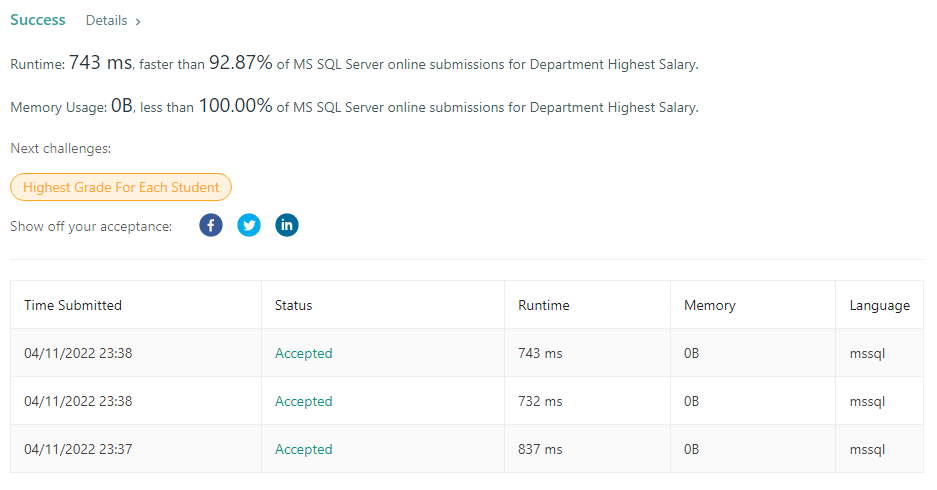



The results are good, but as we noted before server load has a big impact on variation.

--- 

## Solution 2 - MSSQL - Use NOLOCK

Use the NOLOCK table hint.



```sql
/* Write your T-SQL query statement below */
SELECT      d.name AS Department
            , e.name AS Employee
            , e.salary AS Salary
FROM        Department d (NOLOCK)
            JOIN (
                SELECT      departmentId
                            , MAX(salary) AS max_salary
                FROM        Employee (NOLOCK)
                GROUP BY    departmentId                
            ) AS HighSal ON HighSal.departmentId = d.id
            JOIN Employee e (NOLOCK) ON e.departmentId = HighSal.departmentId
                           AND e.salary = HighSal.max_salary

```

### Result

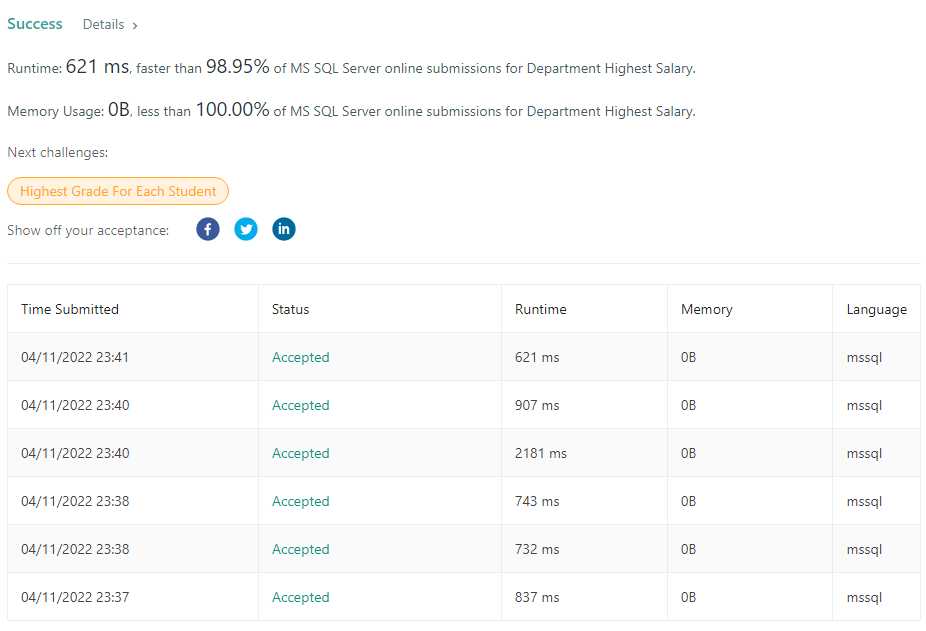



No noticeable difference on a dataset this small

--- 

## Solution 3 - MySQL 

Pretty much the same thing in MySQL. 

```sql
# Write your MySQL query statement below
SELECT      d.name AS Department
            , e.name AS Employee
            , e.salary AS Salary
FROM        Department d
            JOIN (
                SELECT      departmentId
                            , MAX(salary) AS max_salary
                FROM        Employee
                GROUP BY    departmentId                
            ) AS HighSal ON HighSal.departmentId = d.id
            JOIN Employee e ON e.departmentId = HighSal.departmentId
                           AND e.salary = HighSal.max_salary
;

```



### Result


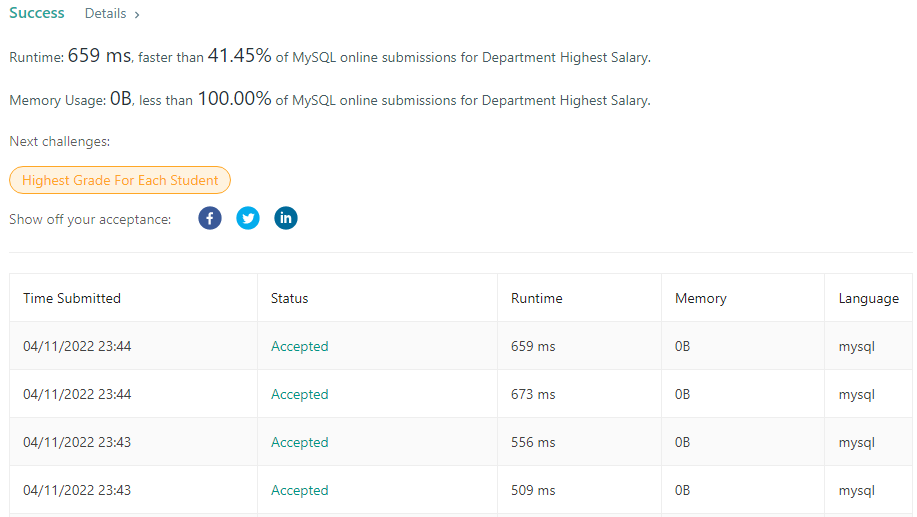



As usual MySQL is kicking butt on MSSQL.

--- 
